In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
%cd gdrive/MyDrive/Major2/Clickbait-Title-Classifier/

/content/gdrive/MyDrive/Major2/Clickbait-Title-Classifier


In [1]:
import numpy as np 
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string as s
import re

import matplotlib.pyplot as plt


import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import os

In [2]:
cb_data= pd.read_csv('Datasets/TitleClickbaitness.csv')

In [3]:
cb_data.head()

,title,isClickbait
0,10 People You Don't Want To Mess With,1
1,I Got Hunted By The FBI,1
2,10 Real Life Giants You Won't Believe Exist,1
3,10 Real Life Giants You Won't Believe Exist,1
4,10 Mythical CREATURES That Actually Existed,1


<AxesSubplot:xlabel='isClickbait', ylabel='count'>

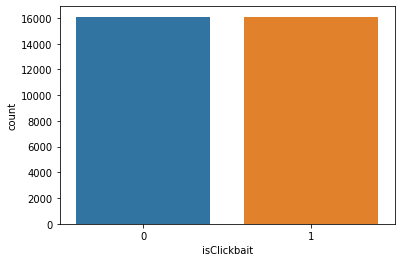

In [4]:
sns.countplot(x='isClickbait',data=cb_data)

In [5]:
x=cb_data.title
y=cb_data.isClickbait
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=22,stratify=cb_data['isClickbait'])
print("No. of elements in training set")
print(train_x.size)
print("No. of elements in testing set")
print(test_x.size)
print(train_x.head())
print(train_y.head())
print(test_x.head())
print(test_y.head())

No. of elements in training set
24149
No. of elements in testing set
8050
13875    23 Healthier Versions Of Your Favorite Holiday...
16916           Saddam Hussein admits to requesting trials
23134      Deutsche Bank in Deal to Diversify Its Business
7897     Someone Needs To Invent This App That Plays Ni...
22684    World's cheapest car launched in India, will g...
Name: title, dtype: object
13875    1
16916    0
23134    0
7897     1
22684    0
Name: isClickbait, dtype: int64
20352    Yani Tseng captures Women's British Open title...
16001    This Little Kid Perfectly Directing Traffic In...
13854    After My Transition, I Stopped Liking Men From...
30944    Surveillance Effort Draws Civil Liberties Concern
13714      16 Things All Girls Should Do In Their Twenties
Name: title, dtype: object
20352    0
16001    1
13854    1
30944    0
13714    1
Name: isClickbait, dtype: int64


In [6]:
def tokenization(text):
    lst=text.split()
    return lst
train_x=train_x.apply(tokenization)
test_x=test_x.apply(tokenization)

In [7]:
def lowercasing(lst):
    new_lst=[]
    for i in lst:
        i=i.lower()
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(lowercasing)
test_x=test_x.apply(lowercasing) 

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sudhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
def remove_stopwords(lst):
    stop=stopwords.words('english')
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

train_x=train_x.apply(remove_stopwords)
test_x=test_x.apply(remove_stopwords)

In [10]:
def remove_punctuations(lst):
    new_lst=[]
    for i in lst:
        for j in s.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(remove_punctuations)
test_x=test_x.apply(remove_punctuations) 

In [11]:
def remove_numbers(lst):
    nodig_lst=[]
    new_lst=[]
    for i in lst:
        for j in s.digits:    
            i=i.replace(j,'')
        nodig_lst.append(i)
    for i in nodig_lst:
        if i!='':
            new_lst.append(i)
    return new_lst
train_x=train_x.apply(remove_numbers)
test_x=test_x.apply(remove_numbers)

In [12]:
def remove_spaces(lst):
    new_lst=[]
    for i in lst:
        i=i.strip()
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(remove_spaces)
test_x=test_x.apply(remove_spaces)

In [13]:
train_x.head()
test_x.head()

20352    [yani, tseng, captures, womens, british, open,...
16001    [little, kid, perfectly, directing, traffic, m...
13854    [transition, stopped, liking, men, gay, porn, ...
30944    [surveillance, effort, draws, civil, liberties...
13714                            [things, girls, twenties]
Name: title, dtype: object

In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sudhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
lemmatizer=nltk.stem.WordNetLemmatizer()
def lemmatzation(lst):
    new_lst=[]
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(lemmatzation)
test_x=test_x.apply(lemmatzation)

In [16]:
train_x=train_x.apply(lambda x: ''.join(i+' ' for i in x))
test_x=test_x.apply(lambda x: ''.join(i+' ' for i in x))

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cov=CountVectorizer(analyzer='word', ngram_range=(1,2),max_features=22500)
train_1=cov.fit_transform(train_x)
test_1=cov.transform(test_x)

In [18]:
train_arr=train_1.toarray()
test_arr=test_1.toarray()
pd.DataFrame(test_arr[:100], columns=cov.get_feature_names_out())

,aa,aaa,aaron,aaron tveit,ab,abandon,abandoned,abbas,abbey,abbott,...,zodiac sign,zoe,zoey,zombie,zombie apocalypse,zone,zoo,zoolander,zuckerberg,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
NB_MN=MultinomialNB()
NB_MN.fit(train_arr,train_y)
pred=NB_MN.predict(test_arr)

In [20]:
from sklearn.metrics import f1_score,accuracy_score
print("F1 score of the MultinomialNB model")
print(f1_score(test_y,pred))
print("Accuracy of the MultinomialNB model")
print(accuracy_score(test_y,pred))
print("Accuracy of the MultinomialNB model in percentage")
print(accuracy_score(test_y,pred)*100,"%")

F1 score of the MultinomialNB model
0.9574126651030738
Accuracy of the MultinomialNB model
0.9571428571428572
Accuracy of the MultinomialNB model in percentage
95.71428571428572 %


In [21]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(test_y,pred))

from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(test_y,pred))

Confusion Matrix
[[3827  198]
 [ 147 3878]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      4025
           1       0.95      0.96      0.96      4025

    accuracy                           0.96      8050
   macro avg       0.96      0.96      0.96      8050
weighted avg       0.96      0.96      0.96      8050



In [22]:
new_title = "India won the world cup"
X_new = cov.transform([new_title])
y_pred = NB_MN.predict(X_new.toarray())

In [23]:
if y_pred[0] == 0:
    print("The title is NOT clickbait.")
else:
    print("The title is clickbait.")

The title is NOT clickbait.


In [24]:
def checkClickbait(title):
    X_new = cov.transform([title])
    y_pred = NB_MN.predict(X_new.toarray())
    return y_pred[0]
#     if y_pred[0] == 0:
#         print("The title is NOT clickbait.")
#     else:
#         print("The title is clickbait.")

In [25]:
checkClickbait("You won't believe this!!")

1

In [26]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=20)

In [ ]:
RF.fit(train_arr,train_y)
pred=RF.predict(test_arr)

In [ ]:
from sklearn.metrics import f1_score,accuracy_score
print("F1 score of the Random Forest model")
print(f1_score(test_y,pred))
print("Accuracy of the Random Forest model")
print(accuracy_score(test_y,pred))
print("Accuracy of the Random Forest model in percentage")
print(accuracy_score(test_y,pred)*100,"%")

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(max_iter=1000)

In [ ]:
LR.fit(train_arr,train_y)
pred=LR.predict(test_arr)

In [ ]:
from sklearn.metrics import f1_score,accuracy_score
print("F1 score of the Logistic Regression model")
print(f1_score(test_y,pred))
print("Accuracy of the Logistic Regression model")
print(accuracy_score(test_y,pred))
print("Accuracy of the Logistic Regression model in percentage")
print(accuracy_score(test_y,pred)*100,"%")

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(max_depth=10)

In [ ]:
dtc.fit(train_arr,train_y)
pred=dtc.predict(test_arr)

In [ ]:
from sklearn.metrics import f1_score,accuracy_score
print("F1 score of the Decision Tree model")
print(f1_score(test_y,pred))
print("Accuracy of the Decision Tree model")
print(accuracy_score(test_y,pred))
print("Accuracy of the Decision Tree model in percentage")
print(accuracy_score(test_y,pred)*100,"%")

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(n_estimators=5)

In [ ]:
xgb.fit(train_arr,train_y)
pred=xgb.predict(test_arr)

In [ ]:
from sklearn.metrics import f1_score,accuracy_score
print("F1 score of the XGBoost model")
print(f1_score(test_y,pred))
print("Accuracy of the XGBoost Tree model")
print(accuracy_score(test_y,pred))
print("Accuracy of the XGBoost model in percentage")
print(accuracy_score(test_y,pred)*100,"%")

In [ ]:
import pickle

In [ ]:
with open('NB_MN.pkl', 'wb') as f:
    pickle.dump(NB_MN, f)

In [ ]:
%ls

In [ ]:
with open('NB_MN.pkl', 'rb') as f:
    clf = pickle.load(f)

# Make predictions on new data
new_title = "India won the world cup"
X_new = cov.transform([new_title])
y_pred = clf.predict(X_new.toarray())

In [ ]:
if y_pred[0] == 0:
        print("The title is NOT clickbait.")
else:
    print("The title is clickbait.")

In [ ]:
df=pd.read_csv('final.csv')

In [ ]:
df

In [34]:
res=[]
for i in df['title']:
    res.append(checkClickbait(i))

In [35]:
res

[1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0]

In [36]:
df['Clickbait_title']=res

In [38]:
df.to_csv('final.csv')